<a href="https://colab.research.google.com/github/annakysilova/Data-Fr/blob/main/Lab3Kysilova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №3**

Импорты и установки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import datetime
plt.style.use('seaborn-whitegrid')

In [2]:
!pip install sklearn

### **Построение графика на основе массива**

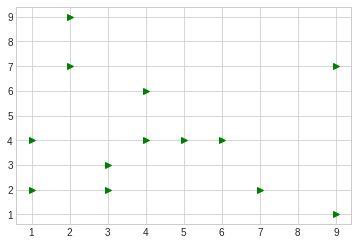

In [3]:
Data=np.array([ [1,2], [9,7], [3,2], [4,6], [3,3], [4,4], [5,4], [6,4], [2,7], [2,9],[7,2], [1,4], [9,1] ])
Column1=0
Column2=1

for i in range(len(Data)):
  plt.plot( Data[i][Column1], Data[i][Column2], 'g>')

plt.show()

### **Построение столбиковой диаграммы на основе массива**

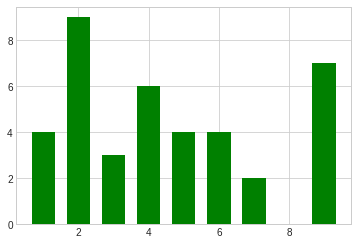

In [4]:
Data=np.array([ [1,2], [9,7], [3,2], [4,6], [3,3], [4,4], [5,4], [6,4], [2,7], [2,9],[7,2], [1,4], [9,1] ])
Column1=0
Column2=1
BarWidth=1/1.5

for i in range( len(Data) ):
  plt.bar(Data[i][Column1], Data[i][Column2], BarWidth , color="green")

plt.show()

### **Построение Scatter plot диаграммы на основе массива**

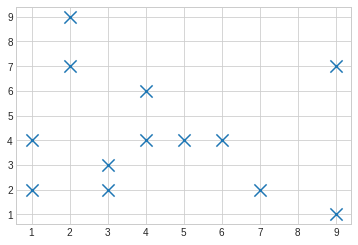

In [5]:
Data=np.array([  [1,2], [9,7], [3,2], [4,6], [3,3], [4,4], [5,4], [6,4], [2,7], [2,9],[7,2], [1,4], [9,1] ])
Column1=0
Column2=1
plt.scatter( Data[:, Column1], Data[:, Column2] , marker = "x" , s=150 , linewidths = 5 , zorder = 1)
plt.show()

### **Построение Парных диаграмм на основе массива**

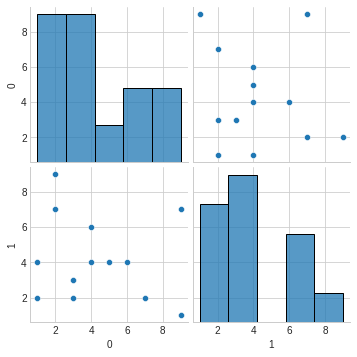

In [6]:
data=np.array([ [1,2], [9,7], [3,2], [4,6], [3,3], [4,4], [5,4], [6,4], [2,7], [2,9],[7,2], [1,4], [9,1] ])
df = pd.DataFrame(Data)

#Calculating Pair Plot Between All Features
seaborn.pairplot(df)
plt.show()

Подключение гугл диска

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Построение Диаграммы с группировкой и условиями**

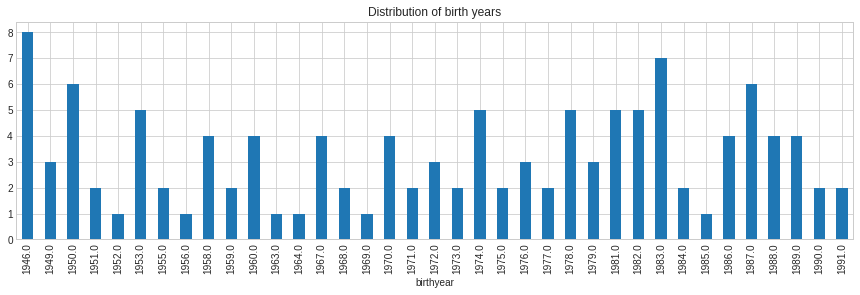

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/cvs/trip.csv')
data = data.sort_values(by='birthyear')
data = data[(data['birthyear'] >= 1931) & (data['birthyear']<=1999)]
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))
plt.show()

### **Построение Диаграммы с долями**

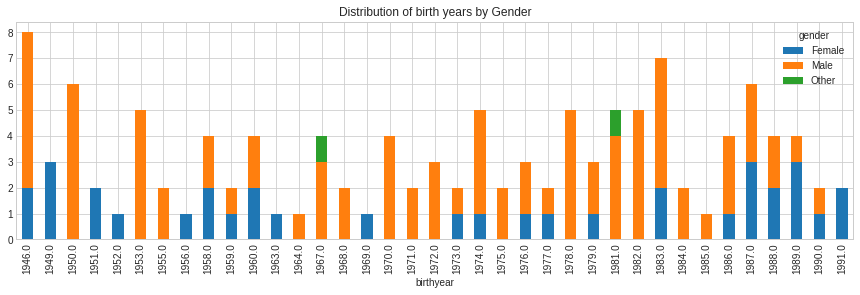

In [9]:
data1 = data.groupby(['birthyear', 'gender']).size().unstack('gender').fillna(0)
data1.plot.bar(title ='Distribution of birth years by Gender', stacked=True, figsize = (15,4))
plt.show()

### **Конвертирование текста в дату**

In [10]:
data['StartTime1'] = data['starttime'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%M")
)
data['year'] = data['StartTime1'].apply(lambda x: x.year )
data['month'] = data['StartTime1'].apply(lambda x: x.month )
data['day'] = data['StartTime1'].apply(lambda x: x.day )
data['hour'] = data['StartTime1'].apply(lambda x: x.hour )

# **Описательная статистика ряда**

### **Расчет средней, среднеквадратичного отклонения и медианы**

In [11]:
print (data['tripduration'].mean())   # Расчет средней
print (data['tripduration'].std())    # Cреднеквадратичное отклонение
print (data['tripduration'].median()) # Mедиана

1065.7854583333333
2386.115634188
639.8744999999999


### **Расчет корреляции**

In [12]:
pd.set_option('precision', 3)
correlations = data[['tripduration','year']].corr()
print(correlations)

              tripduration  year
tripduration           1.0   NaN
year                   NaN   NaN


### **Расчет средней, среднеквадратичного отклонения и медианы**

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### **Загружаем данные по диабету**

In [14]:
diabetes = datasets.load_diabetes()

### **Устанавливаем 20 наблюдений в качестве тестовых**

In [16]:
X_train = diabetes.data[:-20]
X_test = diabetes.data[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

regr = LinearRegression()

### **Обучение**

In [17]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Прогнозирование на тестовых данных**

In [18]:
y_pred = regr.predict(X_test)
print ('R2 score: %f' %r2_score(y_test, y_pred))
print ('Intercept: %f' %regr.intercept_)
print ('Coefficients: %s' %str(regr.coef_))

R2 score: 0.585075
Intercept: 152.764307
Coefficients: [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


### **Построение графика по 3 – переменной массива Х**

Text(0, 0.5, 'Y axis')

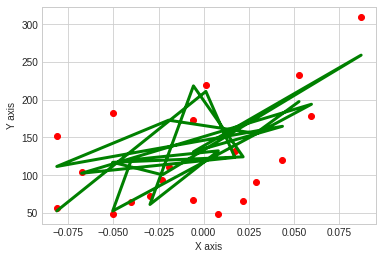

In [19]:
plt.scatter(X_test[:,3], y_test, color='red')
plt.plot(X_test[:,3], y_pred, color='green', linewidth=3)
plt.xlabel('X axis')
plt.ylabel('Y axis')

# **Регрессионная модель (SVM)**

In [20]:
from sklearn.svm import SVR
regr = SVR(kernel='linear')

### **Варианты модели: kernel='linear' или 'poly'или 'rbf'**

In [21]:
regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### **Прогнозирование на тестовых данных**

R2 score: -0.011744
Intercept: 141.284877


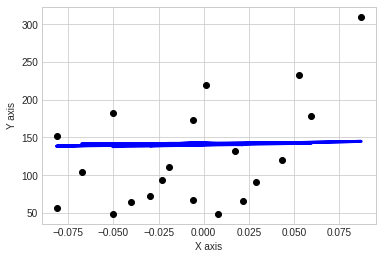

In [22]:
y_pred = regr.predict(X_test)

print ('R2 score: %f'%r2_score(y_test, y_pred))
print ('Intercept: %f'%regr.intercept_)

#print ('Coefficients: %s'%str(regr.coef_))

plt.scatter(X_test[:,3], y_test, color='black')
plt.plot(X_test[:,3], y_pred, color='blue', linewidth=3)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# **Решение задачи классификации**

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Замена значений на категории -1 и 1

y_train = np.where(y_train > 100, 1, -1)
y_test = np.where(y_test > 100, 1, -1)

### **Использование 100 деревьев**

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Расчет точности классификации**

In [25]:
accuracy = rf.score(X_test, y_test)
print ('Accuracy: %f'%accuracy)

Accuracy: 0.800000


# **Задание**

### **2А.Построить столбиковую диаграмму по возрасту и соответствующему их количеству**

In [26]:
#Импорт и демонстрация данных
bd = pd.read_csv('/content/drive/MyDrive/Data Science/train (3) (2).csv')
bd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


In [27]:
#Очистка данных
bd = bd.drop(bd[bd.Age==None].index)
bd = bd.dropna()
bd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.554,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.158,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S


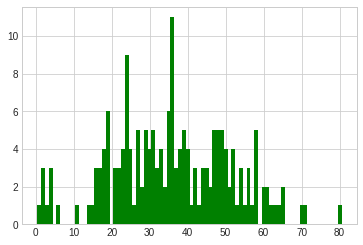

In [28]:
bar_width = 1

for i in bd.index:
  plt.bar(bd.Age[i], len(bd[bd.Age==bd.Age[i]]), bar_width , color="green")

plt.show()

### **2Б.Построить парную диаграмму между количеством пассажиров разделенных по половому признаку и количеству пассажиров разделенных по возрасту**

Sex: female - 1, male - 0


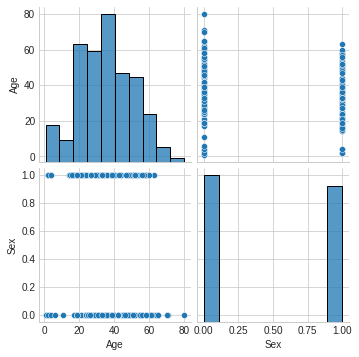

In [39]:
print ('Sex: female - 1, male - 0')
AS_df = pd.DataFrame({
    'Age': bd.Age,
    'Sex': bd.Sex.map(lambda x: 1 if x=='female' else 0)
})

seaborn.pairplot(AS_df)
plt.show()

### **2С.Получить лучшую регрессионную зависимость выживаемости от прочих показателей данных Титаника**

In [51]:
x = pd.DataFrame({
    'Age': bd.Age,
    'Pclass': bd.Pclass,
    'Sex': bd.Sex.map(lambda x: 1 if x=='female' else 0)
})


x_train = x[:-100]
x_test = x[-100:]
y_train = x[:-100]
y_test = x[-100:]

#[(x_test[i][0], y_test[i][0]) for i in range(len(x_test))]

In [52]:
x

,Age,Pclass,Sex
1,38.0,1,1
3,35.0,1,1
6,54.0,1,0
10,4.0,3,1
11,58.0,1,1
...,...,...,...
871,47.0,1,1
872,33.0,1,0
879,56.0,1,1
887,19.0,1,1


In [53]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [54]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Прогнозирование

In [62]:
y_pred = regr.predict(x_test)
print ('R2 score: %f' %r2_score(y_test, y_pred))
print ('Intercept: %f' %regr.intercept_[0])
print ('Coefficients: %s' %str(regr.coef_))

R2 score: 1.000000
Intercept: 0.000000
Coefficients: [[ 1.00000000e+00 -3.76801462e-18  6.80704289e-17]
 [ 6.91274313e-18  1.00000000e+00  1.11022302e-16]
 [ 1.84637663e-18 -5.55111512e-17  1.00000000e+00]]


In [59]:
#Intercept
regr.intercept_

array([ 1.42108547e-14, -8.88178420e-16,  1.11022302e-16])

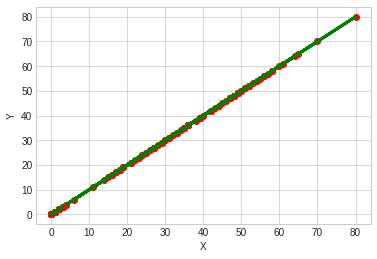

In [60]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='green', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **2Д.Построить классификационную модель для выживаемости на основе деревьев решений**

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [78]:
#Использование 100 деревьев
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf.predict(x_train) 

array([[-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1, -

In [77]:
#Расчет точности классификации
accuracy = rf.score(x_test, y_test)
print('Accuracy: %f'%accuracy)

Accuracy: 1.000000
